In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# VISTA PREVIA DE LOS DATOS

In [51]:
#CARGAMOS LOS DATOS
df = pd.read_excel('accidentes.xlsx')

In [52]:
#VEMOS LOS PRIMEROS REGISTROS
df.head()

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
0,MINERA PACHAPAQUI S.A.C.,PACHAPAQUI,ANCASH,BOLOGNESI,AQUIA,"EXPOSICIÓN A, O CONTACTO CON ENERGÍA ELÉCTRICA",Gran y Mediana Minería,2002-01-06,2002-01-06
1,COMPAÑIA MINERA RAURA S.A.,RAURA,HUANUCO,LAURICOCHA,SAN MIGUEL DE CAURI,DESPRENDIMIENTO DE ROCAS,Gran y Mediana Minería,2002-01-06,2002-01-06
2,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,2002-01-07,2002-01-07
3,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,2002-01-07,2002-01-07
4,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,2002-01-07,2002-01-08


In [53]:
#VEMOS LOS ULTIMOS REGISTROS
df.tail()

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
896,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION JULCANI,HUANCAVELICA,ANGARAES,CCOCHACCASA,"DERRUMBE (CAÍDAS DE MASAS DE TIERRA, DE ROCAS,...",Gran y Mediana Minería,2021-06-15,2021-06-20
897,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ANC 01,ANCASH,RECUAY,PAMPAS CHICO,CAÍDAS DE PERSONAS CON DESNIVELACIÓN [CAÍDAS D...,Gran y Mediana Minería,2021-06-18,2021-06-18
898,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ANC 06C,ANCASH,BOLOGNESI,CAJACAY,ATRAPADA ENTRE UN OBJETO INMÓVIL Y UN OBJETO M...,Gran y Mediana Minería,2021-06-18,2021-06-18
899,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ANDEAN 12 10,PUNO,LAMPA,PARATIA,"DESPLOME (DE EDIFICIOS, DE MUROS, DE ANDAMIOS,...",Gran y Mediana Minería,2021-06-19,2021-06-19
900,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,AP 2015-01,AYACUCHO,LUCANAS,PUQUIO,CAÍDAS DE OBJETOS EN CURSO DE MANUTENCIÓN MANUAL,Gran y Mediana Minería,2021-06-20,2021-06-20


# DIMENSION Y ESTRUCTURA DE LOS DATOS

In [54]:
# MOSTRAMOS EL NUMERO DE COLUMNA Y REGISTROS
df.shape

(901, 9)

In [55]:
#MOSTRAMOS EL NOMBRE DE TODAS LAS COLUMNAS DEL DATASET
df.columns

Index(['TITULAR', 'UNIDAD', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'TIPO_ACCIDENTE', 'CATEGORIA', 'FECHA_ACCIDENTE',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

# INFORMACIÓN DEL DATASET, ESTADISTICA DESCRIPTIVA Y VALORES UNICOS

In [56]:
#VEMOS UN RESUMEN INFORMATIVO DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TITULAR              901 non-null    object        
 1   UNIDAD               901 non-null    object        
 2   DEPARTAMENTO         899 non-null    object        
 3   PROVINCIA            899 non-null    object        
 4   DISTRITO             899 non-null    object        
 5   TIPO_ACCIDENTE       901 non-null    object        
 6   CATEGORIA            833 non-null    object        
 7   FECHA_ACCIDENTE      901 non-null    datetime64[ns]
 8   FECHA_FALLECIMIENTO  901 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 63.5+ KB


In [57]:
#MOSTRAMOS LAS ESTADISTICA DESCRIPTIVA DEL DATASET
descr = df.describe( include = ['O'] ).T
descr

,count,unique,top,freq
TITULAR,901,154,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,114
UNIDAD,901,247,ANA MARIA,26
DEPARTAMENTO,899,19,JUNIN,124
PROVINCIA,899,80,YAULI,108
DISTRITO,899,153,YAULI,84
TIPO_ACCIDENTE,901,39,DESPRENDIMIENTO DE ROCAS,240
CATEGORIA,833,4,Gran y Mediana Minería,742


In [58]:
#VEMOS EL NUMERO DE VALORES UNICOS DE CADA COLUMNA
df.nunique()

,0
TITULAR,154
UNIDAD,247
DEPARTAMENTO,19
PROVINCIA,80
DISTRITO,153
TIPO_ACCIDENTE,39
CATEGORIA,4
FECHA_ACCIDENTE,706
FECHA_FALLECIMIENTO,714


CONCLUSION

Vemos que las columnas "CATEGORIA", "DEPARTAMENTO", "PROVINCIA" Y " DISTRITO" contienen datos nulos.

# TRATAMIENTO DE VALORES NULOS

Verificamos que porcentaje de valores nulos hay por columna para darle tratamiento.

In [59]:
#MOSTRAMOS EL PORCENTAJE DE VALORES NULOS DE CADA COLUMNAS
df.isnull().mean().sort_values(ascending = False) * 100

,0
CATEGORIA,7.547170
DEPARTAMENTO,0.221976
PROVINCIA,0.221976
DISTRITO,0.221976
TITULAR,0.000000
UNIDAD,0.000000
TIPO_ACCIDENTE,0.000000
FECHA_ACCIDENTE,0.000000
FECHA_FALLECIMIENTO,0.000000


In [60]:
df[df['CATEGORIA'].isnull()]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
799,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-30
800,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-20
801,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-31
802,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-03
803,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-30
...,...,...,...,...,...,...,...,...,...
864,COMPAÑIA MINERA PODEROSA S.A.,DEFENSA Nº 15,LA LIBERTAD,SANCHEZ CARRION,COCHORCO,ATRAPADA POR UN OBJETO,NaN,2020-05-20,2020-05-12
865,COMPAÑIA MINERA PODEROSA S.A.,DANIEL,SAN MARTIN,TOCACHE,SHUNTE,ESFUERZOS FÍSICOS EXCESIVOS AL EMPUJAR OBJETOS...,NaN,2020-06-05,2020-06-10
866,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,GOLPES POR OBJETOS MÓVILES (COMPRENDIDOS LOS F...,NaN,2020-08-16,2020-08-16
867,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ANCOYO III,AREQUIPA,CASTILLA,CHOCO,ATRAPADA ENTRE UN OBJETO INMÓVIL Y UN OBJETO M...,NaN,2020-08-24,2020-12-01


In [61]:
df[df['DEPARTAMENTO'].isnull()]
#df[df.isnull().any(axis=1)]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
569,INKABOR S.A.C.,BORAX,NaN,NaN,NaN,CAÍDAS DE PERSONAS,Gran y Mediana Minería,2011-02-26,2011-02-27
793,MINERALES LIMA,MINERALES-DIEZ,NaN,NaN,NaN,ATRAPADA POR UN OBJETO,Pequeña Minería,2017-08-28,2017-08-28


In [62]:
df[df['PROVINCIA'].isnull()]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
569,INKABOR S.A.C.,BORAX,NaN,NaN,NaN,CAÍDAS DE PERSONAS,Gran y Mediana Minería,2011-02-26,2011-02-27
793,MINERALES LIMA,MINERALES-DIEZ,NaN,NaN,NaN,ATRAPADA POR UN OBJETO,Pequeña Minería,2017-08-28,2017-08-28


In [63]:
df[df['DISTRITO'].isnull()]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
569,INKABOR S.A.C.,BORAX,NaN,NaN,NaN,CAÍDAS DE PERSONAS,Gran y Mediana Minería,2011-02-26,2011-02-27
793,MINERALES LIMA,MINERALES-DIEZ,NaN,NaN,NaN,ATRAPADA POR UN OBJETO,Pequeña Minería,2017-08-28,2017-08-28


Observamos que 4 columnas presentan valores nulos ("CATEGORIA", "DEPARTAMENTO", "PROVINCIA" y "DISTRITO"). Empezaremos por tratar los registro que se repiten en las columnas "DEPARTAMENTO", "PROVINCIA" y "DISTRITO".

## TRATAMIENTO DEL REGISTRO - INKABOR S.A.C.
Buscamos el primer registro con valores nulos que tiene como titulo "INKABOR S.A.C". Tras una investagación en internet encontramos los datos faltantes de la mina de "BORAX" con su titular "INKABOR S.A.C" (https://energiminas.com/2023/12/06/arequipa-inkabor-busca-adicionar-y-modificar-componentes-con-inversion-de-us17-4-millones-en-mina-borax/).

In [64]:
filtro_borax = (df['TITULAR'] == 'INKABOR S.A.C.') & (df['UNIDAD'] == 'BORAX')
df[filtro_borax]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
569,INKABOR S.A.C.,BORAX,NaN,NaN,NaN,CAÍDAS DE PERSONAS,Gran y Mediana Minería,2011-02-26,2011-02-27


In [65]:
#Datos sacados de https://energiminas.com/2023/12/06/arequipa-inkabor-busca-adicionar-y-modificar-componentes-con-inversion-de-us17-4-millones-en-mina-borax/
df.loc[filtro_borax, 'DEPARTAMENTO'] = 'AREQUIPA'
df.loc[filtro_borax, 'PROVINCIA'] = 'AREQUIPA'
df.loc[filtro_borax, 'DISTRITO'] = 'SAN JUAN DE TARUCANI'

## TRATAMIENTO PARA EL REGISTRO - MINERALES LIMA

En cuanto a este registro, no encontramos ninguna información respecto a esa mina. Procederemos a eliminarlo.

In [66]:
df[df['DEPARTAMENTO'].isnull()]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
793,MINERALES LIMA,MINERALES-DIEZ,NaN,NaN,NaN,ATRAPADA POR UN OBJETO,Pequeña Minería,2017-08-28,2017-08-28


In [67]:
df.drop(df[df['DEPARTAMENTO'].isnull()].index, inplace = True)

## TRATAMIENTO DE VALORES NULOS DE LA COLUMNA "CATEGORIA"

In [68]:
#TOTAL DE VALORES NULOS DE LA COLUMNAS CATEGORIA
df['CATEGORIA'].isnull().sum()

68

In [69]:
# DISTRIBUCIÓN DE LOS VALORES NULOS EN LOS DIFERENTES  TITULARES
filtro_categoria = df[df['CATEGORIA'].isnull()]#filtro1
filtro_categoria

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
799,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-30
800,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-20
801,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-31
802,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-03
803,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-30
...,...,...,...,...,...,...,...,...,...
864,COMPAÑIA MINERA PODEROSA S.A.,DEFENSA Nº 15,LA LIBERTAD,SANCHEZ CARRION,COCHORCO,ATRAPADA POR UN OBJETO,NaN,2020-05-20,2020-05-12
865,COMPAÑIA MINERA PODEROSA S.A.,DANIEL,SAN MARTIN,TOCACHE,SHUNTE,ESFUERZOS FÍSICOS EXCESIVOS AL EMPUJAR OBJETOS...,NaN,2020-06-05,2020-06-10
866,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,GOLPES POR OBJETOS MÓVILES (COMPRENDIDOS LOS F...,NaN,2020-08-16,2020-08-16
867,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ANCOYO III,AREQUIPA,CASTILLA,CHOCO,ATRAPADA ENTRE UN OBJETO INMÓVIL Y UN OBJETO M...,NaN,2020-08-24,2020-12-01


In [70]:
filtro_categoria['TITULAR'].value_counts()

,count
TITULAR,
COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,52
COMPAÑIA MINERA PODEROSA S.A.,8
MINERA YANACOCHA S.R.L.,5
REVOREDO GARCIA CALDERON HUGO RENE,2
MINERA CUPROCOCHA S.R.L.,1


## TRATAMIENTO PARA LA CATEGORIA - COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.

In [71]:
# FILTRAMOS TODAS LAS MINAS DEL TITULAR 'COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.'
filtro_buenaventura = df[df['TITULAR']=='COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.']

In [72]:
#MOSTRAMOS TODOS LOS REGISTROS QUE CONTIENEN VALORES NULOS
filtro_buenaventura[filtro_buenaventura['CATEGORIA'].isnull()]

,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
799,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-30
800,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-20
801,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-31
802,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-03
803,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-30
804,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-01-29
805,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-03
806,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ACUMULACION ANGELICA 2007,HUANCAVELICA,HUANCAVELICA,HUACHOCOLPA,CAÍDAS DE PERSONAS QUE OCURREN AL MISMO NIVEL,NaN,2020-01-01,2020-02-05
807,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,AMATE 10B,MOQUEGUA,GENERAL SANCHEZ CERRO,COALAQUE,CAÍDAS DE PERSONAS CON DESNIVELACIÓN [CAÍDAS D...,NaN,2020-01-06,2020-01-29
808,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,AMATE 10B,MOQUEGUA,GENERAL SANCHEZ CERRO,COALAQUE,CAÍDAS DE PERSONAS CON DESNIVELACIÓN [CAÍDAS D...,NaN,2020-01-06,2020-02-06


In [73]:
#MOSTRAMOS LA CANTIDAD DE REGISTROS QUE CONTIENEN VALORES NULOS
filtro_buenaventura['CATEGORIA'].isnull().sum()

52

In [74]:
#MOSTRAMOS LA CANTIDAD DE CATEGORIA(S) DEL TITULAR DE LA MINA
filtro_buenaventura['CATEGORIA'].value_counts()

,count
CATEGORIA,
Gran y Mediana Minería,62


In [75]:
filtro_1 = (df['TITULAR'] == 'COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.') & (df['CATEGORIA'].isnull())
df.loc[filtro_1, 'CATEGORIA'] = 'Gran y Mediana Minería'

CONCLUSIONES

Notamos que para la mina "COMPAÑIA DE MINAS BUENAVENTURA S.A.A." todos sus categoria corresponde a "Gran y Mediana Minería" por ende llenamos esos valores con la misma categoría. Y con el mismo razonamiento procedemos a llenar los sgte valores nulos de las demas minas.

## TRATAMIENTO PARA LA CATEGORIA - COMPAÑIA MINERA PODEROSA S.A.

In [76]:
# MOSTRAMOS TODOS LOS REGISTRO DE COMPAÑIA MINERA PODEROSA S.A.
filtro_poderosa = (df['TITULAR'] == 'COMPAÑIA MINERA PODEROSA S.A.') & (df['CATEGORIA'].isnull())

In [77]:
df.loc[filtro_poderosa, 'CATEGORIA'] = 'Gran y Mediana Minería'

## TRATAMIENTO PARA LA MINA - MINERA YANACOCHA S.R.L.

In [78]:
filtro_yanacocha = (df['TITULAR']=='MINERA YANACOCHA S.R.L.') & (df['CATEGORIA'].isnull())
df.loc[filtro_yanacocha, 'CATEGORIA'] = 'Gran y Mediana Minería'

## TRATAMIENTO PARA LA MINA - MINERA CUPROCOCHA S.R.L.

In [79]:
filtro_cuprococha =(df['TITULAR'] == 'MINERA CUPROCOCHA S.R.L.') & (df['CATEGORIA'].isnull())
df.loc[filtro_cuprococha, 'CATEGORIA'] = 'Gran y Mediana Minería'

## TRATAMIENTO PARA LA MINA - REVOREDO GARCIA CALDERON HUGO RENE	BENJAMIN
https://www.gob.pe/institucion/regionlima/normas-legales/4000942-165-2017-grl-grde-drem


https://cdn.www.gob.pe/uploads/document/file/4259218/Resoluci%C3%B3n%20Directoral%20N%C2%B0%20165-2017-GRL-GRDE/DREM.pdf?v=1678904722

In [80]:
filtro_revoredo =(df['TITULAR'] == 'REVOREDO GARCIA CALDERON HUGO RENE')# & (df['CATEGORIA'].isnull())
df.loc[filtro_revoredo, 'CATEGORIA'] = 'Pequeña Minería'

# INGENIERIA DE CARACTERISTICAS

Procedemos a crear las siguientes columnas "ANIO_ACCIDENTE" y "MES_ACCIDENTE" y "DIFERENCIAS_DIAS" para ver la visualizacion.

In [81]:
df['ANIO_ACCIDENTE'] = df['FECHA_ACCIDENTE'].dt.year
df['MES_ACCIDENTE'] = df['FECHA_ACCIDENTE'].dt.month
df['DIFERENCIA_DIAS'] = (df['FECHA_FALLECIMIENTO'] - df['FECHA_ACCIDENTE']).dt.days

In [82]:
df['MES_NAME_ACCIDENTE']  = df['FECHA_ACCIDENTE'].dt.month_name()

# VISUALIZACIÓN DE DATOS

In [83]:
fecha = df['ANIO_ACCIDENTE'].value_counts().sort_index()

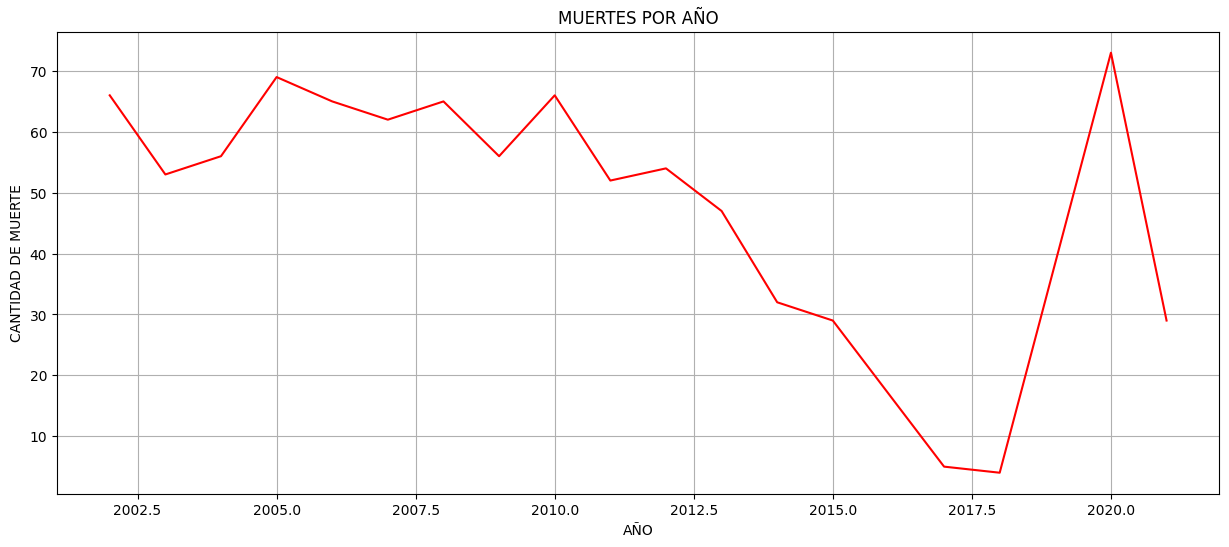

In [84]:
plt.figure(figsize=(15, 6))
plt.plot(fecha.index, fecha.values, color='red')
plt.title('MUERTES POR AÑO')
plt.xlabel('AÑO')
plt.ylabel('CANTIDAD DE MUERTE')
plt.grid()
plt.show()

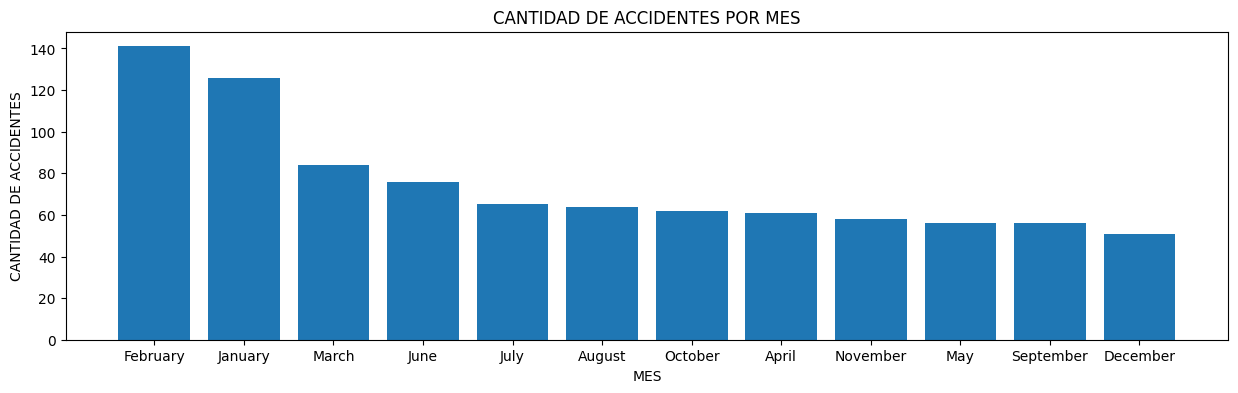

In [85]:
accidentes_por_mes = df['FECHA_ACCIDENTE'].dt.month_name().value_counts()

plt.figure(figsize=(15, 4))
plt.bar(accidentes_por_mes.index, accidentes_por_mes.values)
plt.title("CANTIDAD DE ACCIDENTES POR MES")
plt.ylabel("CANTIDAD DE ACCIDENTES")
plt.xlabel("MES")
plt.show()

In [86]:
titular = df['TITULAR'].value_counts().head(10)

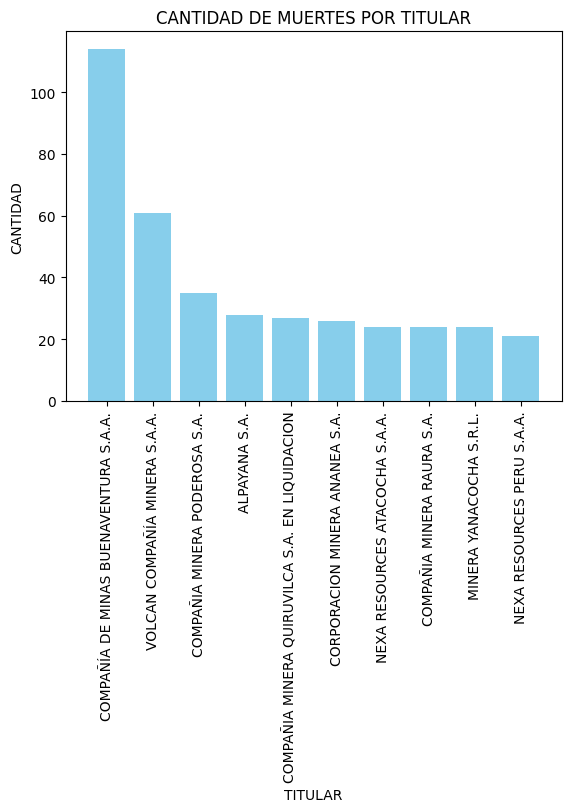

In [87]:
plt.bar(titular.index, titular.values, color='skyblue')
plt.title('CANTIDAD DE MUERTES POR TITULAR')
plt.xlabel('TITULAR')
plt.ylabel('CANTIDAD')
plt.xticks( rotation = 90 )
plt.show()

In [88]:
tipo_accidente = df['TIPO_ACCIDENTE'].value_counts().head(10)

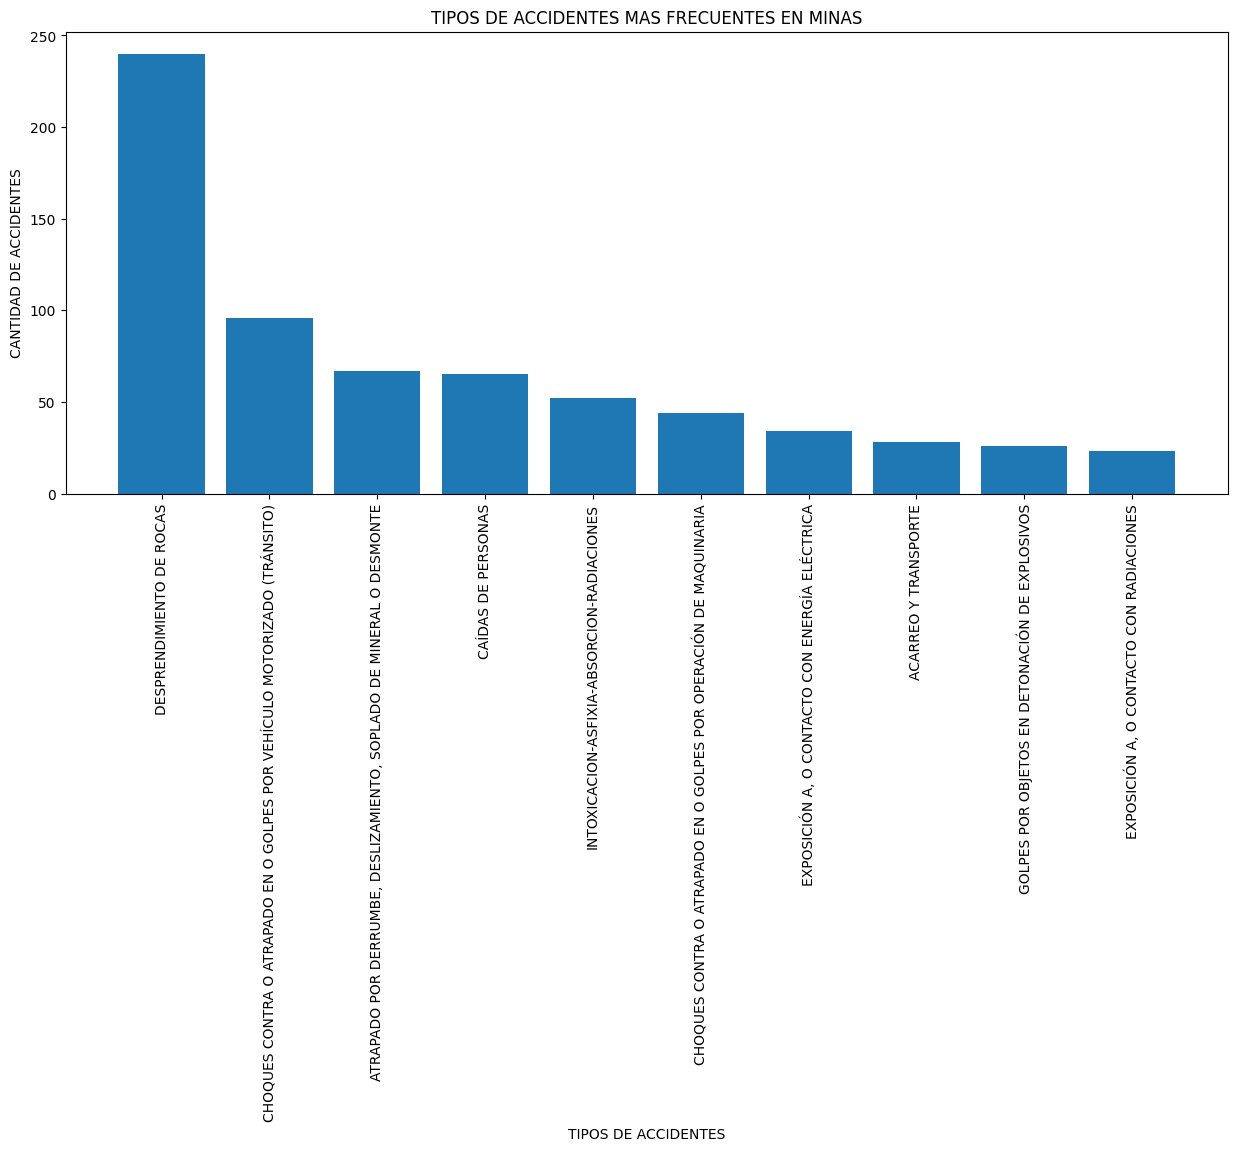

In [89]:
plt.figure(figsize=(15,6))
plt.bar(tipo_accidente.index, tipo_accidente.values)
plt.title("TIPOS DE ACCIDENTES MAS FRECUENTES EN MINAS")
plt.ylabel("CANTIDAD DE ACCIDENTES")
plt.xlabel("TIPOS DE ACCIDENTES")
plt.xticks(rotation=90)
plt.show()

In [90]:
accidente_cat = df.groupby(['CATEGORIA', 'TIPO_ACCIDENTE']).size().reset_index(name='CANTIDAD').sort_values(by='CANTIDAD', ascending=False)
acc_1 = accidente_cat[accidente_cat['CATEGORIA'] == 'Gran y Mediana Minería'].head(4)
acc_2 = accidente_cat[accidente_cat['CATEGORIA'] == 'Pequeña Minería'].head(4)
acc_3 = accidente_cat[accidente_cat['CATEGORIA'] == 'Minería Artesanal'].head(4)
acc_4 = accidente_cat[accidente_cat['CATEGORIA'] == 'Sin Categoría'].head(4)

In [91]:
datos_combinados = pd.concat([acc_1, acc_2, acc_3, acc_4])

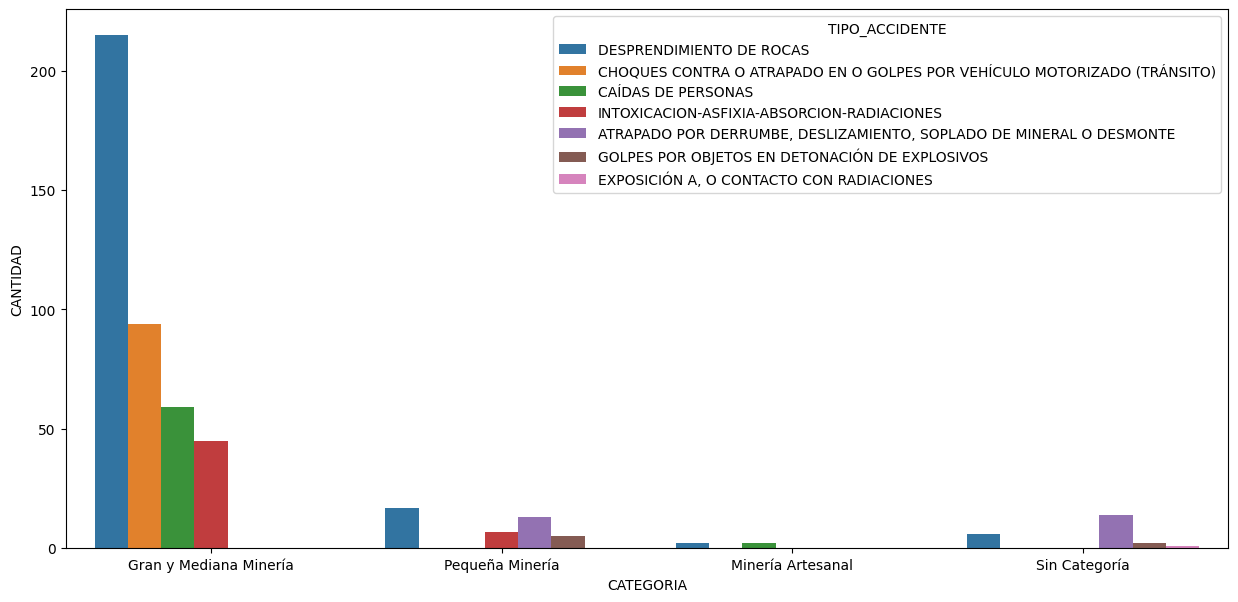

In [92]:
plt.figure(figsize=(15, 7))
sns.barplot(data=datos_combinados, x='CATEGORIA', y='CANTIDAD', hue='TIPO_ACCIDENTE')
plt.show()

In [93]:
accidentes_por_departamento = df.groupby('DEPARTAMENTO').size().reset_index(name='CANTIDAD_ACCIDENTES').sort_values(by='CANTIDAD_ACCIDENTES', ascending=False)

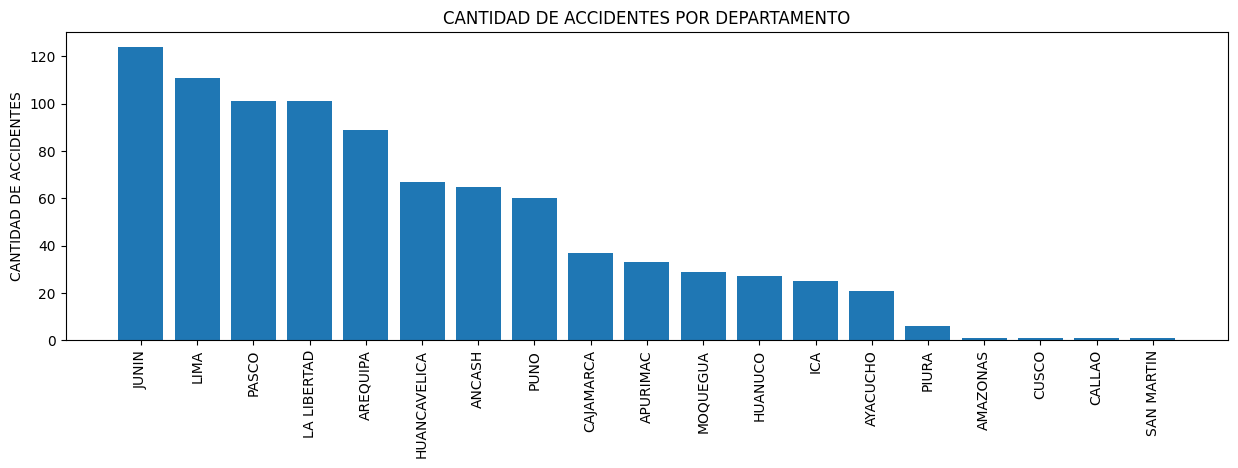

In [94]:
plt.figure(figsize=(15, 4))
plt.bar(accidentes_por_departamento['DEPARTAMENTO'], accidentes_por_departamento['CANTIDAD_ACCIDENTES'])
plt.title("CANTIDAD DE ACCIDENTES POR DEPARTAMENTO")
plt.ylabel("CANTIDAD DE ACCIDENTES")
plt.xticks(rotation=90)
plt.show()

In [95]:
ACC = df.groupby(['DEPARTAMENTO', 'MES_NAME_ACCIDENTE']).size().reset_index(name='CANTIDAD').sort_values(by='CANTIDAD', ascending=False).head(25)
#ACC

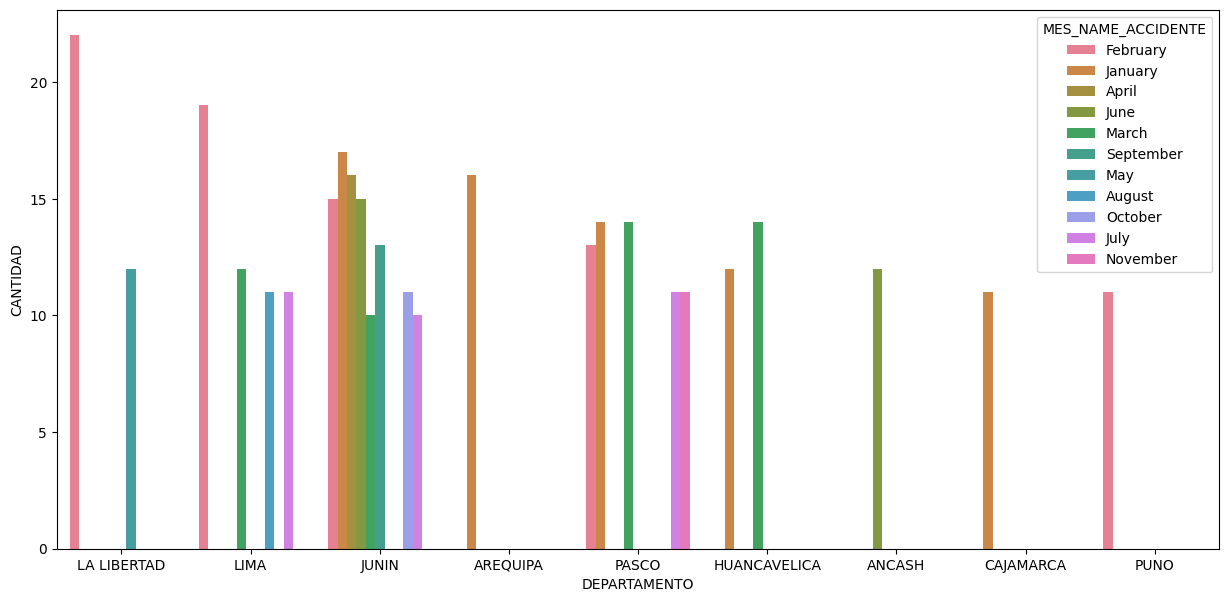

In [96]:
plt.figure(figsize=(15, 7))
sns.barplot(data=ACC, x='DEPARTAMENTO', y='CANTIDAD', hue='MES_NAME_ACCIDENTE')
plt.show()

# CONCLUSIONES Y OBSERVACIONES

### Hallazgos principales

1. Se observa una disminución de muertes entre los años 2010 al 2017. Tambien un aumento significativo de 2017 al 2020.

2. En los meses de febrero y enero presentan la mayor cantidad de muerte. posiblemente debido a las condiciones climaticas.

3. La empresa Compañia de Minas Buenaventura S.A.A. tiene cuenta con la mayor número de muertes. Se podria considerar revisar sus protocoles de seguridad.

4. El desprendimiento de rocas es el accidente más frecuente.

5. Se observa que la Gran y mediana mineria es la que cuenta con la mayor cantidad de muerte, lo que sugiere que podria estar relacionado con el sector de escala de operaciones.

6. El departamento de Junin es la que presenta la mayor cantidad de muertes, seguidos de Lima, Pasco y La Libertad.